# BPL_TEST2_Batch - demo

In [1]:
run -i BPL_TEST2_Batch_fmpy_explore.py

Windows - run FMU pre-compiled JModelica 2.14

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

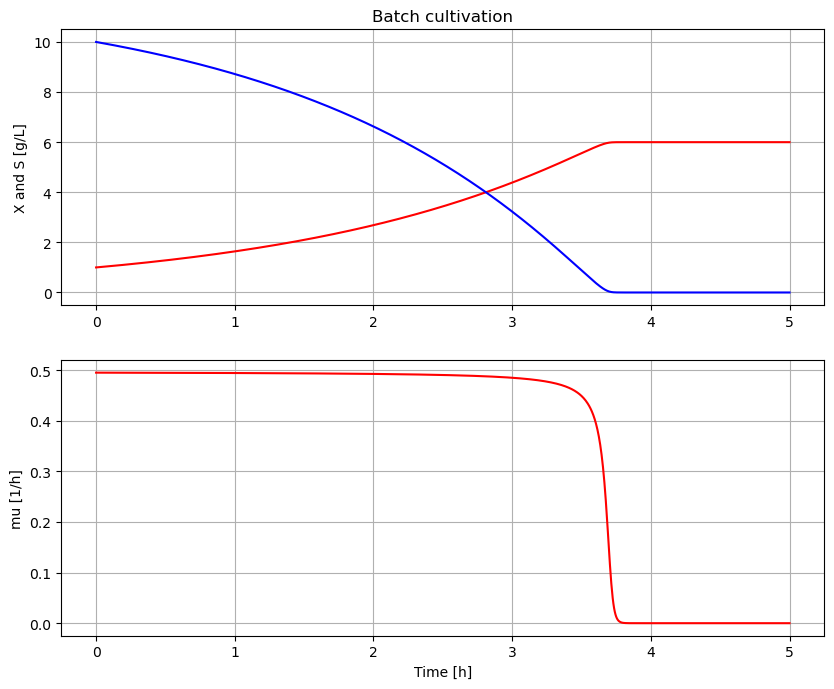

In [3]:
# Simulation with default values of the process
newplot(plotType='TimeSeries')
simu()

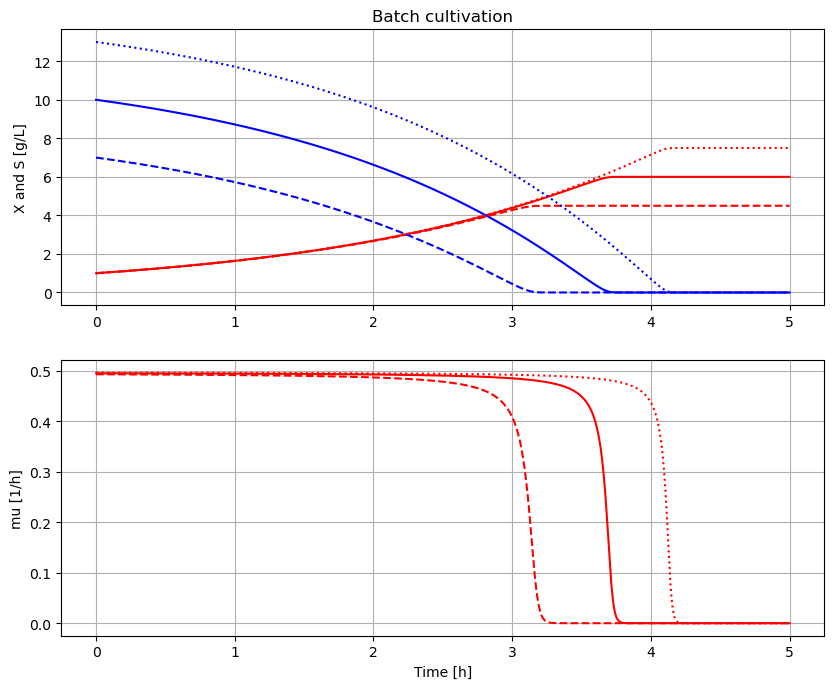

In [4]:
# Simulation were initial value of substrate VS_0 is varied
newplot(plotType='TimeSeries') 
for value in [10, 7, 13]: init(VS_0=value); simu(5)

# Restore default value of VS_0
init(VS_0=10)

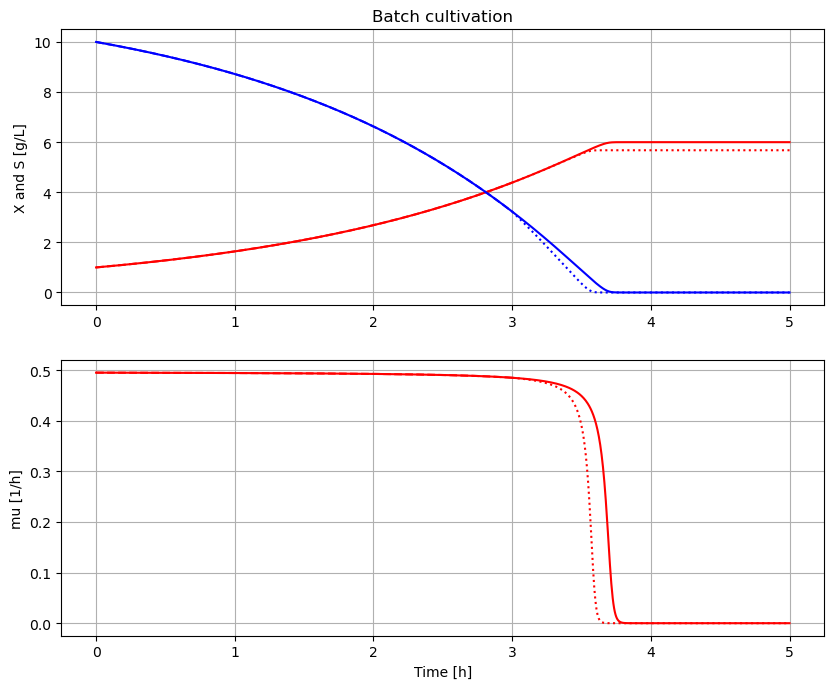

In [5]:
# Simulation where metabolism is changed after 3 hours
newplot(plotType='TimeSeries') 
simu(5)

simu(3)
par(Y=0.4, qSmax=1.0/(0.4/0.5)); simu(2, 'cont')

# Restore default value of Y and qSmax
par(Y=0.5, qSmax=1.0)

In [6]:
disp('culture')

Y : 0.5
qSmax : 1.0
Ks : 0.1


In [7]:
describe('mu')

Cell specific growth rate variable : 0.0 [ 1/h ]


In [8]:
describe('parts')

['bioreactor', 'bioreactor.culture', 'liquidphase', 'MSL']


In [9]:
describe('MSL')

MSL: none


In [10]:
system_info()


System information
 -OS: Windows
 -Python: 3.9.16
 -Scipy: not installed in the notebook
 -FMPy: 0.3.15
 -FMU by: JModelica.org
 -FMI: 2.0
 -Type: CS
 -Name: BPL_TEST2.Batch
 -Generated: 2022-10-06T08:12:54
 -MSL: 3.2.2 build 3
 -Description: Bioprocess Library version 2.1.0
 -Interaction: FMU-explore for FMPy version 0.9.7a


try: stateDict
except NameError:
    continuous_states = []
    for variable in model_description.modelVariables:
        if variable.derivative is not None: 
            continuous_states.append(variable.derivative.name)
    stateDict = {key:None for key in continuous_states}

for key in stateDict.keys():
    stateDict[key] = model_get(key)  

stateDict

In [11]:
z=dict(list(parDict.items()) + list(stateDict.items()))

In [12]:
z

{'V_0': 1.0,
 'VX_0': 1.0,
 'VS_0': 10,
 'Y': 0.5,
 'qSmax': 1.0,
 'Ks': 0.1,
 'bioreactor.V': 1.0,
 'bioreactor.m[1]': 5.677064330494159,
 'bioreactor.m[2]': 2.6951470070788704e-42}

In [13]:
stateDict

{'bioreactor.V': 1.0,
 'bioreactor.m[1]': 5.677064330494159,
 'bioreactor.m[2]': 2.6951470070788704e-42}

In [14]:
stateDict.keys()

dict_keys(['bioreactor.V', 'bioreactor.m[1]', 'bioreactor.m[2]'])

In [15]:
stateDictInitial = {'bioreactor.V':'bioreactor.V_0', 
           'bioreactor.m[1]':'bioreactor.m_0[1]',
           'bioreactor.m[2]':'bioreactor.m_0[2]'}

In [16]:
parDictExt = dict(list(parDict.items()) + [(stateDictInitial[key], stateDict[key]) for key in stateDict.keys()])

In [17]:
parDictExt

{'V_0': 1.0,
 'VX_0': 1.0,
 'VS_0': 10,
 'Y': 0.5,
 'qSmax': 1.0,
 'Ks': 0.1,
 'bioreactor.V_0': 1.0,
 'bioreactor.m_0[1]': 5.677064330494159,
 'bioreactor.m_0[2]': 2.6951470070788704e-42}

In [18]:
parLocation

{'V_0': 'bioreactor.V_0',
 'VX_0': 'bioreactor.m_0[1]',
 'VS_0': 'bioreactor.m_0[2]',
 'Y': 'bioreactor.culture.Y',
 'qSmax': 'bioreactor.culture.qSmax',
 'Ks': 'bioreactor.culture.Ks',
 'mu': 'bioreactor.culture.mu',
 'V': 'bioreactor.V',
 'VX': 'bioreactor.m[1]',
 'VS': 'bioreactor.m[2]'}

In [19]:
stateDictInitial.values()

dict_values(['bioreactor.V_0', 'bioreactor.m_0[1]', 'bioreactor.m_0[2]'])

In [20]:
parDictRed = parDict.copy()
for key in parDict.keys():
    if parLocation[key] in stateDictInitial.values():
        del parDictRed[key]

In [21]:
parDictRed

{'Y': 0.5, 'qSmax': 1.0, 'Ks': 0.1}

In [22]:
parDictMod = dict(list(parDictRed.items()) + [(stateDictInitial[key], stateDict[key]) for key in stateDict.keys()])

In [23]:
parDictMod

{'Y': 0.5,
 'qSmax': 1.0,
 'Ks': 0.1,
 'bioreactor.V_0': 1.0,
 'bioreactor.m_0[1]': 5.677064330494159,
 'bioreactor.m_0[2]': 2.6951470070788704e-42}

In [24]:
parDictRed.keys()

dict_keys(['Y', 'qSmax', 'Ks'])

In [25]:
parDict

{'V_0': 1.0, 'VX_0': 1.0, 'VS_0': 10, 'Y': 0.5, 'qSmax': 1.0, 'Ks': 0.1}

In [26]:
stateDict

{'bioreactor.V': 1.0,
 'bioreactor.m[1]': 5.677064330494159,
 'bioreactor.m[2]': 2.6951470070788704e-42}

In [27]:
# Create stateDictInitial and parDictRed, parLocationRed - code moved outside later
stateDictInitial = {'bioreactor.V':'bioreactor.V_0', 
                    'bioreactor.m[1]':'bioreactor.m_0[1]',
                    'bioreactor.m[2]':'bioreactor.m_0[2]'}  
stateDictInitialLoc = {'bioreactor.V_0':'bioreactor.V_0',
                       'bioreactor.m_0[1]':'bioreactor.m_0[1]',
                       'bioreactor.m_0[2]':'bioreactor.m_0[2]'}
parDictRed = parDict.copy()
parLocationRed = parLocation.copy()
for key in parDict.keys():
    if parLocation[key] in stateDictInitial.values(): 
        del parDictRed[key]  
        del parLocationRed[key]
parLocationMod = dict(list(parLocationRed.items()) + list(stateDictInitialLoc.items()))

In [28]:
stateDictInitial

{'bioreactor.V': 'bioreactor.V_0',
 'bioreactor.m[1]': 'bioreactor.m_0[1]',
 'bioreactor.m[2]': 'bioreactor.m_0[2]'}

In [29]:
stateDictInitialLoc

{'bioreactor.V_0': 'bioreactor.V_0',
 'bioreactor.m_0[1]': 'bioreactor.m_0[1]',
 'bioreactor.m_0[2]': 'bioreactor.m_0[2]'}

In [30]:
parDictRed

{'Y': 0.5, 'qSmax': 1.0, 'Ks': 0.1}

In [31]:
parLocationRed

{'Y': 'bioreactor.culture.Y',
 'qSmax': 'bioreactor.culture.qSmax',
 'Ks': 'bioreactor.culture.Ks',
 'mu': 'bioreactor.culture.mu',
 'V': 'bioreactor.V',
 'VX': 'bioreactor.m[1]',
 'VS': 'bioreactor.m[2]'}

In [32]:
parLocationMod

{'Y': 'bioreactor.culture.Y',
 'qSmax': 'bioreactor.culture.qSmax',
 'Ks': 'bioreactor.culture.Ks',
 'mu': 'bioreactor.culture.mu',
 'V': 'bioreactor.V',
 'VX': 'bioreactor.m[1]',
 'VS': 'bioreactor.m[2]',
 'bioreactor.V_0': 'bioreactor.V_0',
 'bioreactor.m_0[1]': 'bioreactor.m_0[1]',
 'bioreactor.m_0[2]': 'bioreactor.m_0[2]'}

In [33]:
parDictMod

{'Y': 0.5,
 'qSmax': 1.0,
 'Ks': 0.1,
 'bioreactor.V_0': 1.0,
 'bioreactor.m_0[1]': 5.677064330494159,
 'bioreactor.m_0[2]': 2.6951470070788704e-42}

In [34]:
{parLocationMod[k]:parDictMod[k] for k in parDictMod.keys()}

{'bioreactor.culture.Y': 0.5,
 'bioreactor.culture.qSmax': 1.0,
 'bioreactor.culture.Ks': 0.1,
 'bioreactor.V_0': 1.0,
 'bioreactor.m_0[1]': 5.677064330494159,
 'bioreactor.m_0[2]': 2.6951470070788704e-42}